In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
from csvReader import get_data
from residualPrediction import ResidualPrediction
from seasonalPrediction import SeasonalPrediction
register_matplotlib_converters()

Setup Parameter

In [2]:
data = get_data(start='2015-1-1', end='2020-02-17', update_data=False)  # end=date.today()
future_target = 24
predict_from = len(data) - future_target - 1

Setup and train the neural network. Predict the residual component

In [3]:
res_pred = ResidualPrediction(complete_data=data, future_target=future_target, start=predict_from)
res_pred.initialize_network(learning_rate=0.001)
res_pred.train_network(train=False, checkpoint="testing")
res_pred.predict(num_predicitons=1, random_offset=False)

Mean error of the 1 predicitons: 3.6


Setup and fit the statistical model and predict the seasonal component

In [4]:
# Seasonal
seasonal_pred = SeasonalPrediction(data=data, forecast_length=future_target, train_length=future_target * 2,
                                   start=predict_from)
seasonal_pred.fit_model()
seasonal_pred.predict()

c:\users\felix\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\felix\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


Setup and fit the statistical model and predict the trend component

In [5]:
# Trend
trend_truth = data["Trend"].iloc[predict_from:predict_from + future_target]

Combine the components back to price curve and determine error

In [6]:
# Combine predictions
sum_pred = res_pred.prediciton_truth_error[0][0] + seasonal_pred.pred + trend_truth
truth = data["Price"].iloc[predict_from:predict_from + future_target]
error = np.around(np.sqrt(np.mean(np.square(truth - sum_pred))), 2)


Plot the predictions of components and their combination with the corresponding truth

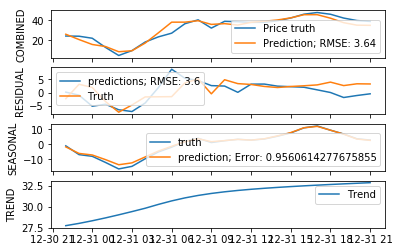

In [7]:
fig, ax = plt.subplots(4, 1, sharex=True)
res_pred.plot_predictions(ax)
seasonal_pred.plot_predictions(ax)
ax[3].plot(trend_truth, label="Trend")
ax[3].legend()
ax[3].set_ylabel("TREND")
ax[0].plot(truth, label="Price truth")
ax[0].plot(sum_pred, label='Prediction; RMSE: {}'.format(error))
ax[0].legend()
ax[0].set_ylabel("COMBINED")
plt.show();